# Capstone 3: Forecasting Solar Power Using LTSM  
### "Exploring ML Techniques for Solar Predictions"
## Exploratory Data Analysis Objectives: 
### 1. Understand Data Distribution  
- Examine statistical summaries of key features.  
- Identify skewness and distribution patterns in numerical data.  
- Visualize density plots and histograms for variables.  

### 2. Identify Relationships and Trends  
- Correlation Analysis to identify relationships between features
- Time-Series Analysis to analyze trends in solar power generation and weather conditions over time.


### 3. Outlier Detection & Anomaly Investigation  
- Identify Outliers by using box plots to detect anomalies in power generation or weather conditions. Highlighting potential outliers that could skew the forecasting model's accuracy.
- Investigate Anomalies for detected outliers, by investigating patterns in weather data that may explain unusual behavior


In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
os.chdir('C:/Users/aamal/Desktop/Springboard/Springboard_DataScience/Capstone-3-Solar/Data')

p1_gen = pd.read_csv('plant_1_generation_cleaned.csv')
p2_gen = pd.read_csv('plant_2_generation_cleaned.csv')
p1_weather = pd.read_csv('plant_1_weather_cleaned.csv')
p2_weather = pd.read_csv('plant_2_weather_cleaned.csv')

## 1. Understand Data Distribution 

In [60]:
p1_gen.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,Hour,Day,Month,Year
0,2020-05-15 00:00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,0,15,5,2020
1,2020-05-15 00:00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0,0,15,5,2020
2,2020-05-15 00:00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0,0,15,5,2020
3,2020-05-15 00:00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0,0,15,5,2020
4,2020-05-15 00:00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0,0,15,5,2020


In [62]:
p1_gen.info

<bound method DataFrame.info of                  DATE_TIME  PLANT_ID       SOURCE_KEY  DC_POWER  AC_POWER  \
0      2020-05-15 00:00:00   4135001  1BY6WEcLGh8j5v7       0.0       0.0   
1      2020-05-15 00:00:00   4135001  1IF53ai7Xc0U56Y       0.0       0.0   
2      2020-05-15 00:00:00   4135001  3PZuoBAID5Wc2HD       0.0       0.0   
3      2020-05-15 00:00:00   4135001  7JYdWkrLSPkdwr4       0.0       0.0   
4      2020-05-15 00:00:00   4135001  McdE0feGgRqW7Ca       0.0       0.0   
...                    ...       ...              ...       ...       ...   
68773  2020-06-17 23:45:00   4135001  uHbuxQJl8lW7ozc       0.0       0.0   
68774  2020-06-17 23:45:00   4135001  wCURE6d3bPkepu2       0.0       0.0   
68775  2020-06-17 23:45:00   4135001  z9Y9gH1T5YWrNuG       0.0       0.0   
68776  2020-06-17 23:45:00   4135001  zBIq5rxdHJRwDNY       0.0       0.0   
68777  2020-06-17 23:45:00   4135001  zVJPv84UY57bAof       0.0       0.0   

       DAILY_YIELD  TOTAL_YIELD  Hour  Day 

### Visualize density plots and histograms for variables. 

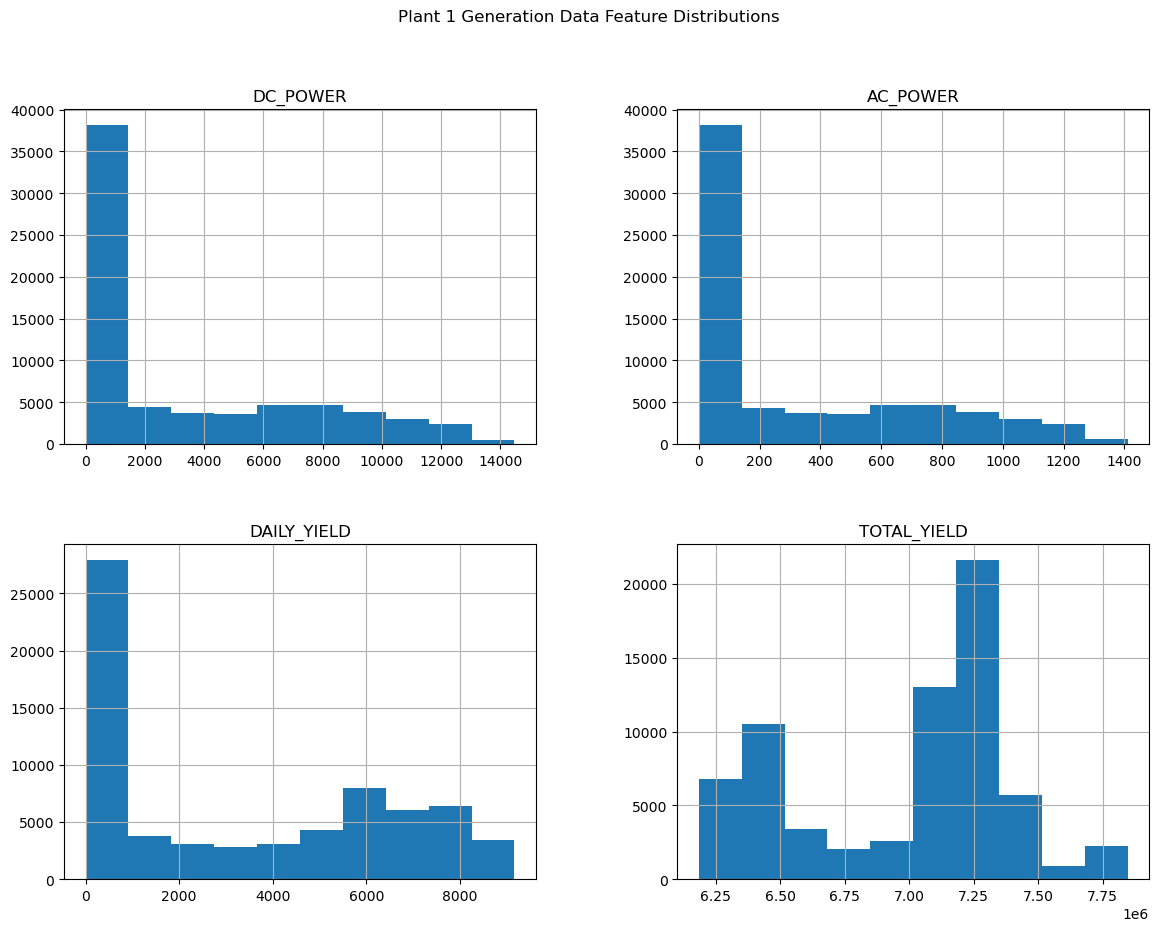

In [71]:

p1_gen[['DC_POWER', 'AC_POWER', 'DAILY_YIELD', 'TOTAL_YIELD']].hist(figsize=(14, 10))
plt.suptitle("Plant 1 Generation Data Feature Distributions")
plt.show()

Insights on distribution:
- DC_POWER & AC_POWER, both features exhibit a steep decline in frequency as power increases (suggesting skewed distribution). 
- DAILY_YIELD, gradual decline with peaks in higher ranges indicates possible outliers. Transformations like scaling or normalization can help manage such discrepancies.
- TOTAL_YIELD, clusters around specific values, suggesting grouped or cumulative data that may need preprocessing. 

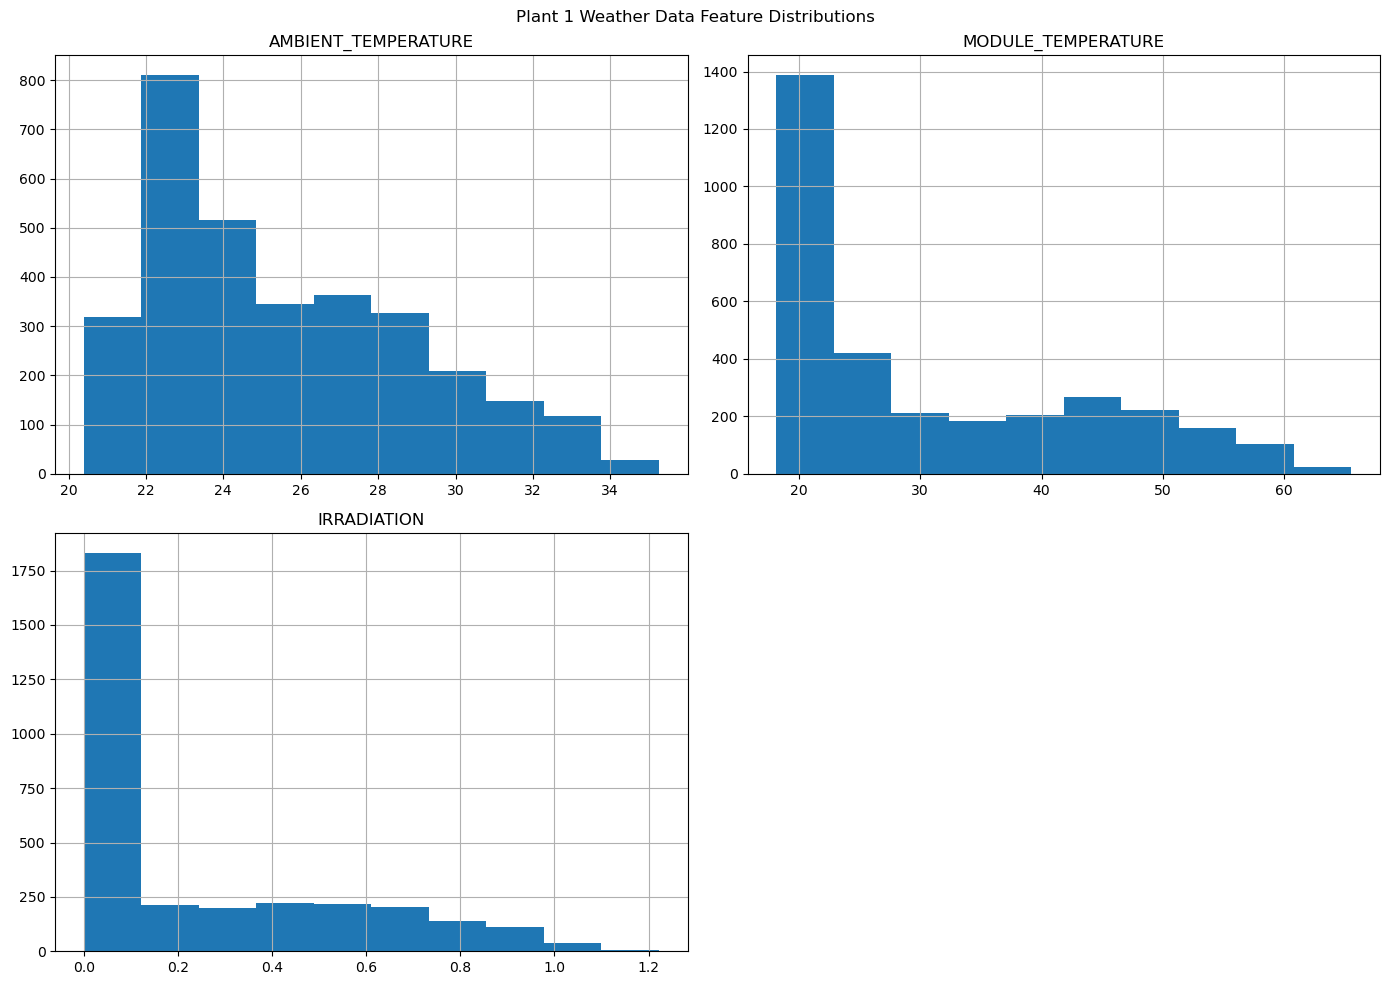

In [73]:
# Plant 1 Weather Data
plant_1_weather[['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']].hist(figsize=(14, 10))
plt.suptitle("Plant 1 Weather Data Feature Distributions")
plt.tight_layout()
plt.show()

Insight on distribution: 
- Normalized distribution is seen for Ambient Temperature, a slightly for  Module Temperature. 
- There is a noticable right-skew to Irradition variable, potential to apply a log transformation to help skewness. 

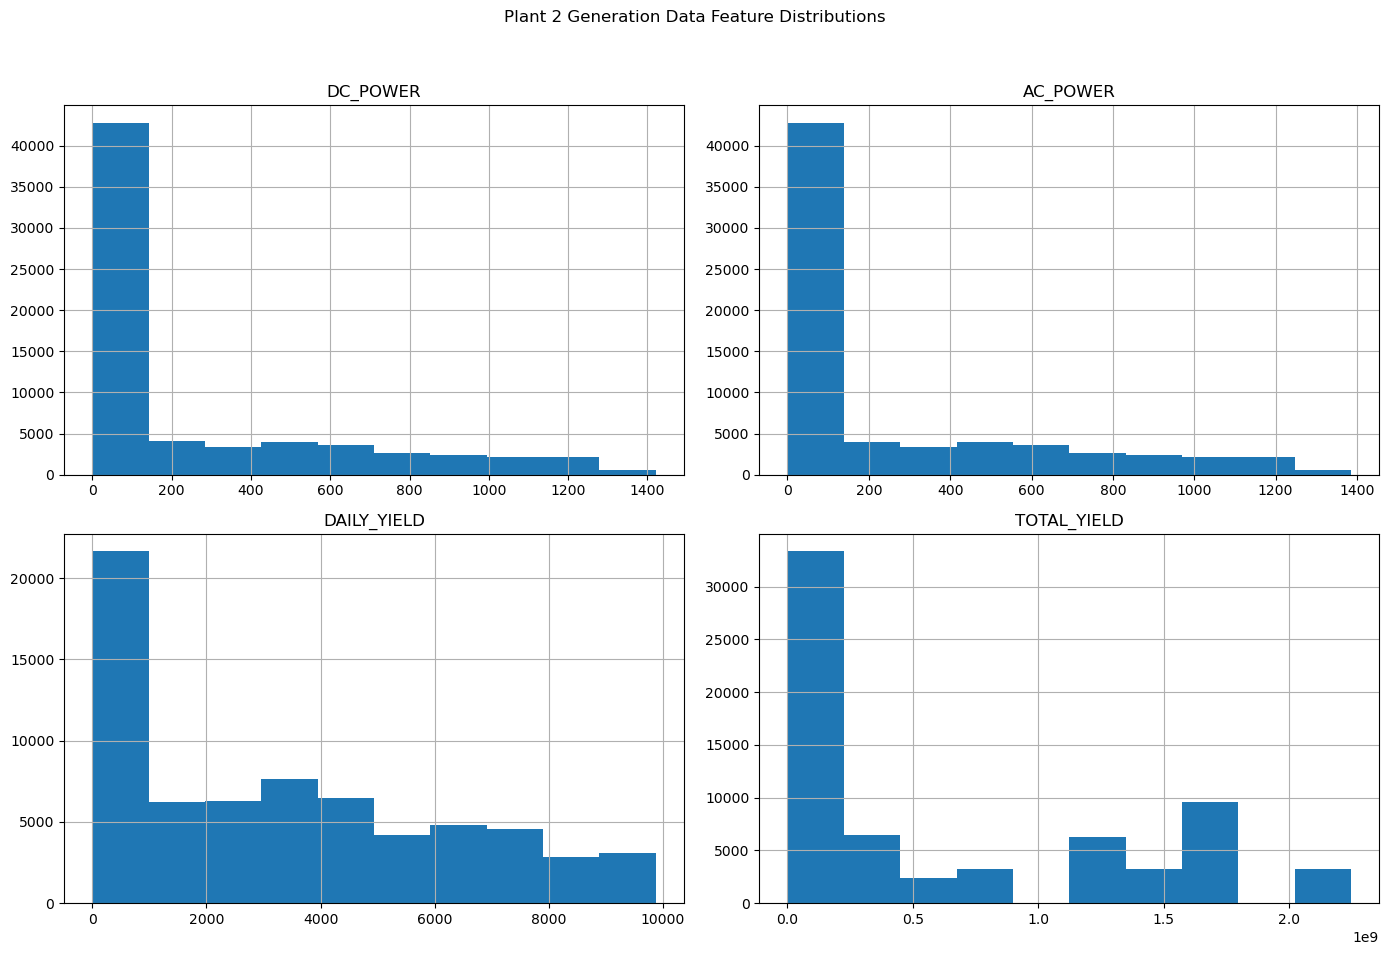

In [52]:
# Plant 2 Generation Data
plant_2_generation[['DC_POWER', 'AC_POWER', 'DAILY_YIELD', 'TOTAL_YIELD']].hist(figsize=(14, 10))
plt.suptitle("Plant 2 Generation Data Feature Distributions")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

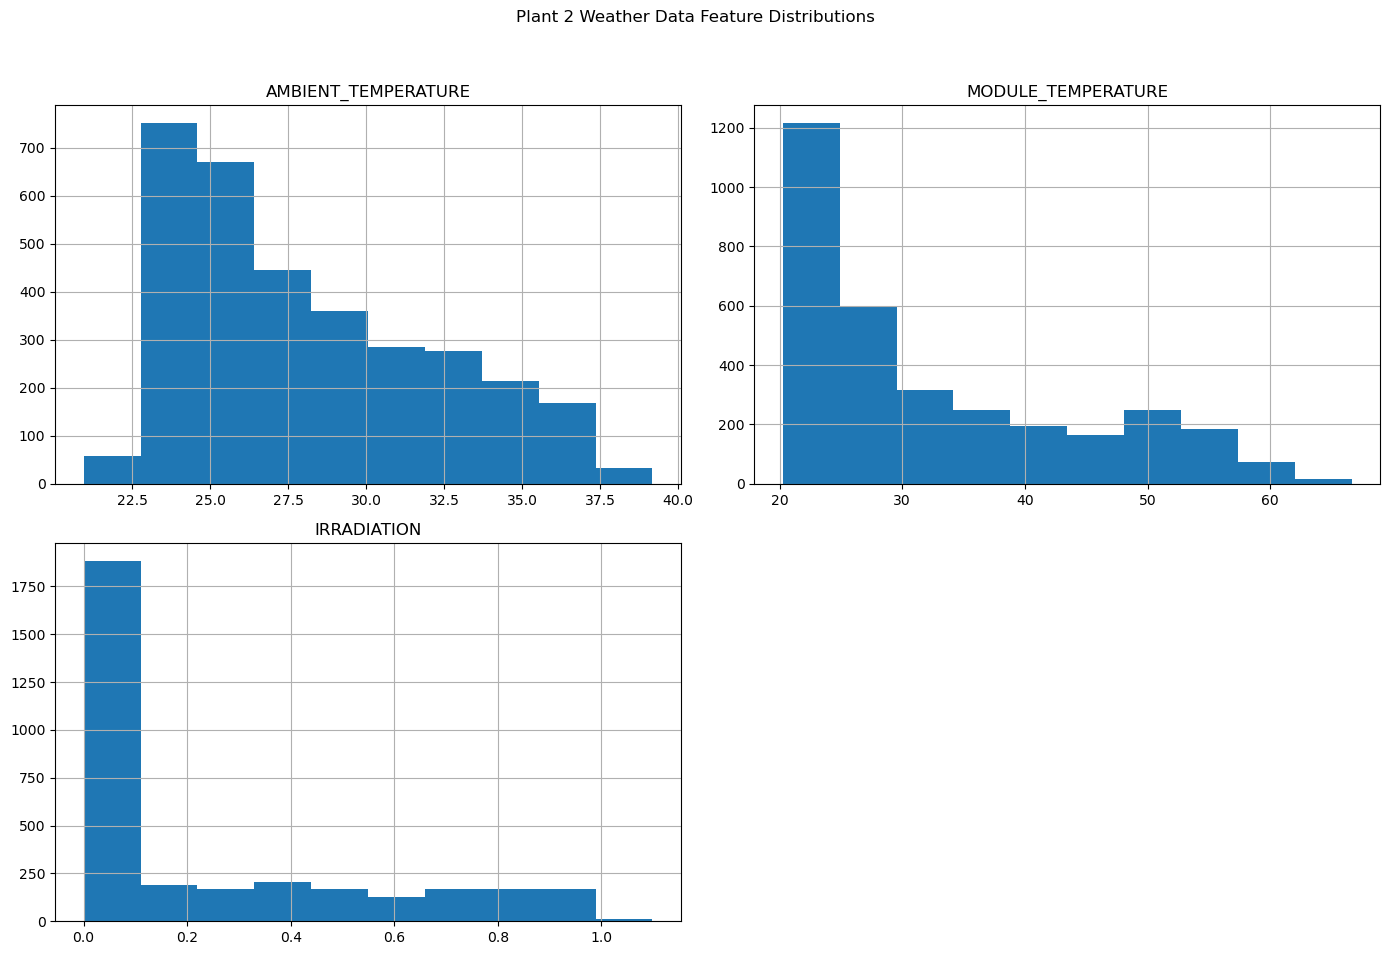

In [54]:
# Plant 2 Weather Data
plant_2_weather[['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']].hist(figsize=(14, 10))
plt.suptitle("Plant 2 Weather Data Feature Distributions")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

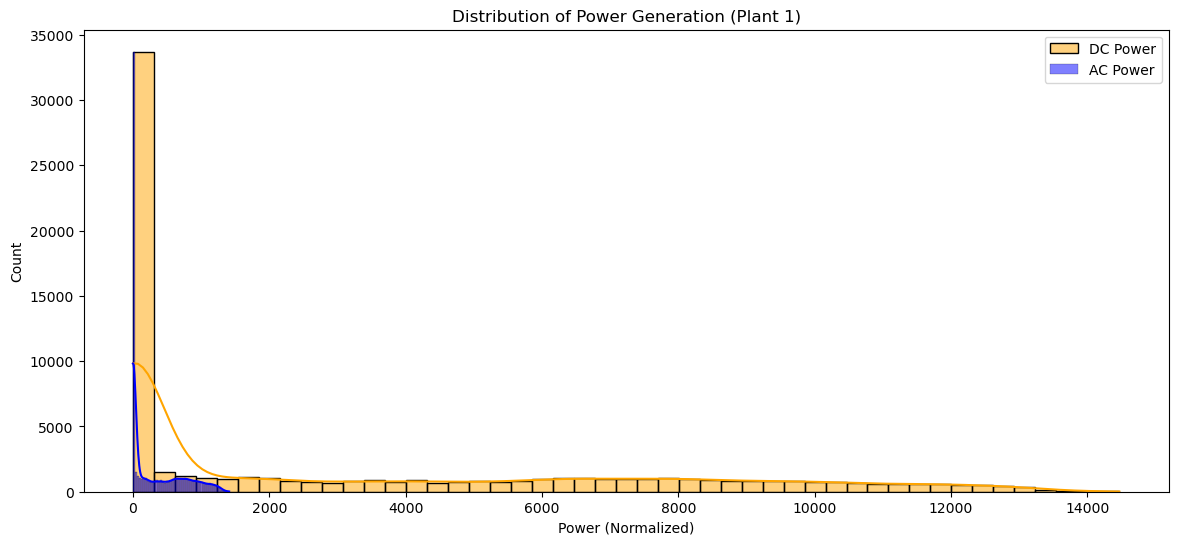

In [32]:
# Distribution of DC Power and AC Power
plt.figure(figsize=(14, 6))
sns.histplot(plant_1_generation['DC_POWER'], kde=True, color='orange', label='DC Power')
sns.histplot(plant_1_generation['AC_POWER'], kde=True, color='blue', label='AC Power')
plt.title('Distribution of Power Generation (Plant 1)')
plt.xlabel('Power (Normalized)')
plt.legend()
plt.show()

## 2. Identify Relationships and Trends  

### Correlation Analysis

In [ ]:
# Correlation heatmap for Plant 1 Generation
plt.figure(figsize=(10, 6))
sns.heatmap(plant_1_generation.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap: Plant 1 Generation')
plt.show()

# Correlation heatmap for Plant 1 Weather
plt.figure(figsize=(10, 6))
sns.heatmap(plant_1_weather.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap: Plant 1 Weather')
plt.show()

### Time-Series Analysis

### 3. Outlier Detection & Anomaly Investigation 